<h1><center>CO2 Emission - Prediction Model</center></h1>

Climate change due to carbon dioxide (CO2) emissions is one of the most complex challenges threatening our planet. This issue considered as a great and international concern that primary attributed from different fossil fuels.

To reduce the effect of Global Warming caused mainly due to CO2 cars manufacturing companies are pre-estimating the CO2 emissions for a newly manufactured car that is about to launch in near future based on the features of car.

This project deals with estimating the CO2 Emissions for a newly manufactured car by making Regression models which can accurately predetermine the car CO2 emissions before it is being launched.

### The Data given here is for Year 2014 manufactured Cars.

- YEAR – Year of manufacturing of car.

- MAKE – Manufacturing company name.

- VEHICLECLASS – Type of vehicle like SUV or medium sized etc.

- ENGINESIZE – Size of the car’s engine (expressed in cc or cubic centimetre).

- CYLINDERS – Number of Cylinders in the engine.

- TRANSMISSION – Automatic or manual transmission with number of gears.

- FUELTYPE – It indicates the type of fuel car use i.e. Diesel, Petrol, Z (Unleaded Petrol) etc.

- FUELCONSUMPTION_CITY – Fuel consumption or Fuel economy of car while running in city expressed in miles per gallon.

- FUELCONSUMPTION_HWY - Fuel Consumption or Fuel economy of car on highway expressed in miles per gallon.

- FUELCONSUMPTION_COMB – Net or combination of Fuel Economy expressed in miles per gallon.

- FUELCONSUMPTION_COMB_MPG – Total fuel economy expressed in miles per gallon.

- CO2EMISSIONS – The CO2 emitted by the car expressed in grams.

## Task 1 – Loading the Data:
Importing the required libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics

In [3]:
emission = pd.read_csv('CO2_emission.csv')
emission.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Task 2 - Analysing and cleaning data

### a) Analyse the shape of the Data using emission dataframe variable. Check the no. of rows and Columns available.

In [3]:
emission.shape

(1067, 13)

The data frame has: 

- 1067 rows and 

- 13 columns

### b) Print the top 5 rows and check the values.

In [4]:
emission.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# emission['FUELTYPE'].value_counts(dropna=False)
# plt.figure(figsize=(13, 8))
# sns.swarmplot(emission['FUELTYPE'], emission['CO2EMISSIONS'])
# plt.show()

In [4]:
emission.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

#### Checking for null values.

In [6]:
# here we find that there are no null values
emission.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

We can clearly see that there are no null values. So we dont need to manage them.

### c) Pick out four columns from the above dataframe which contributes towards CO2 emissions for a car and rename it as emission_new.

#### Now, we have to select the features on which CO2 Emissions are dependent
- MODELYEAR: model year is 2014 for all records, so it does not help us to determine the emissions.

- MAKE: make or company of a car does not affect the emissions.
same for MODEL and VEHICLECLASS.

- ENGINESIZE: It can help to determine the emissions, as a larger engine will certainly produce larger emissions.

- CYLINDERS: More number of cylinders means more amount of gas. This may result in more emissions.

__Now we have following attributes which are quite similar:__

1. FUELCONSUMPTION_CITY
2. FUELCONSUMPTION_HWY
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_COMB_MPG

Instead of using all these features, __we can just use the FUELCONSUMPTION_COMB feature.__ 

Because it represents the combination of other attributes (i.e. fuel consumption in the city and on the highway), and that too in a normalised manner.
We should have minimum number of features to keep the model simple.

So, __we will just select FUELCONSUMPTION_COMB.__

- CO2EMISSIONS has to be included as it is the feature we want to predict.

So, finally we extract the following columns and store them in a new data frame:
1. ENGINESIZE
2. CYLINDERS
3. FUELCONSUMPTION_COMB
4. CO2EMISSIONS

In [5]:
emission_new = emission[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
emission_new.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


## Task 3 - Perform explanatory analysis

In [7]:
emission_new.dtypes

ENGINESIZE              float64
CYLINDERS                 int64
FUELCONSUMPTION_COMB    float64
CO2EMISSIONS              int64
dtype: object

In [8]:
emission_new.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


count of values of all variables is 1067, so we can say that __there are no missing values.__


- ENGINESIZE:
 - Range: 1.000000 to 8.400000
 - Data Type: Floating Point.
 - Unit: Cubic Centimetres (cc).
 
- CYLINDERS:
 - Range: 3.000000 to 12.000000
 - Data Type: Integer
 - Unit: No unit.
 
- FUELCONSUMPTION_COMB:
 - Range: 4.700000 to 25.800000
 - Data Type: Floating Point
 - Unit: miles per gallon
 
- CO2EMISSIONS:
 - Range: 108.000000 to 488.000000
 - Data Type: Integer
 - Unit: grams
 

We can observe that, __scale of CO2EMISSIONS is very large as compared to other variables.__

## Task 4 - Visualizing the Data

###  (a) Explain the result in your words for emission_new dataset using hist () function

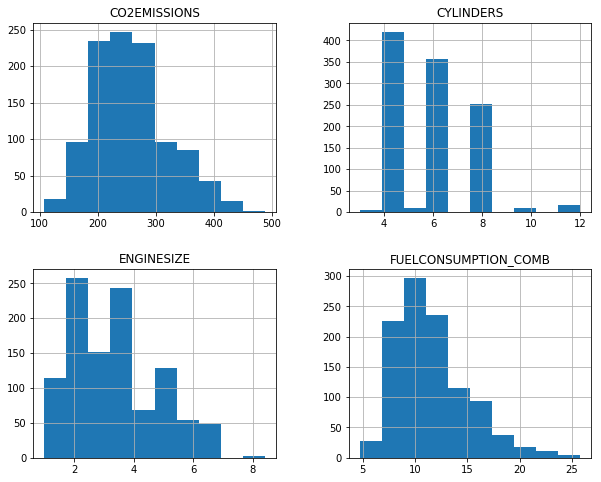

In [10]:
#histogram
emission_new.hist(figsize=(10,8))
plt.show()

The distribution for CO2EMISSIONS and FUELCONSUMPTION_COMB is Gaussian and it is left skewed.

There are no observable trends in The distribution of ENGINESIZE and CYLINDERS.

### b) Next you need to find out the dependent variable from all the selected 4 columns from initial dataframe using the corr () function.

In [10]:
#correlation
emission_new.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


Here, CO2EMISSIONS column has highest correlation with all other variables.

This means that it is highly co-dependent on all of the variables.

So, __CO2EMISSIONS is selected as the dependent variable.__

### c) Plot a heatmap for correlation between all columns of emission_new dataframe.

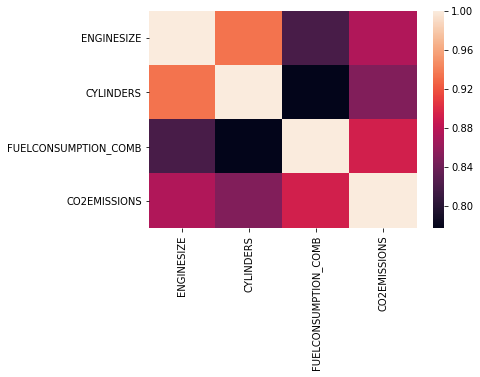

In [23]:
sns.heatmap(emission_new.corr())
plt.show()

### d) Create a figure and plot 3 scatterplot graphs in same row. 

### Analyse the graphs and conclude which columns are best fit for the independent variables for carrying out Linear Regression 

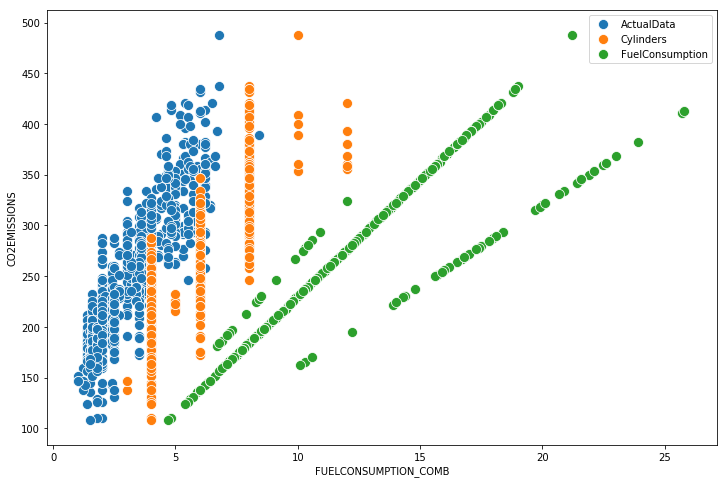

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot('ENGINESIZE', 'CO2EMISSIONS', s=100, data=emission_new, label='ActualData')
sns.scatterplot('CYLINDERS', 'CO2EMISSIONS', s=100, data=emission_new, label='Cylinders')
sns.scatterplot('FUELCONSUMPTION_COMB', 'CO2EMISSIONS', s=100, data=emission_new, label='FuelConsumption')
plt.legend()
plt.show()

Here we observe that:

- Engine Size and CO2 emissions have a linear relationship.

- Fuel consumption and CO2 emissions have a clear linear relationship.

- But, we dont observe any pattern when comparing number of cylinders and CO2 emissions.

So, we finally select enginesize and fuel consumption to build the model.

### e) 
Now as we have concluded that CO2EMISSIONS is a dependent variable and ENGINESIZE, FUELCONSUMPTION_COMB are the two independent variables so plot an lmplot between:

ENGINESIZE and CO2EMISSIONS

FUELCONSUMPTION_COMB and CO2EMISSIONS

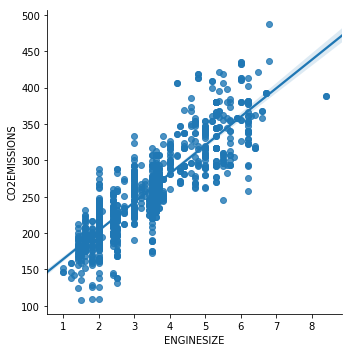

In [17]:
sns.lmplot('ENGINESIZE', 'CO2EMISSIONS', emission_new)
plt.show()

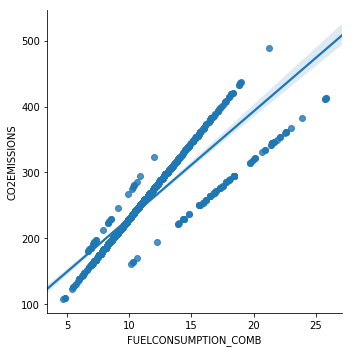

In [12]:
sns.lmplot('FUELCONSUMPTION_COMB', 'CO2EMISSIONS', emission_new)
plt.show()

## Task 5: Linear Regression using Train and Test data

### (a)
Use emission_new Pandas dataframe to split data into training dataset and test dataset and perform Linear Regression keeping all the parameters as decided above.

In [73]:
from sklearn.model_selection import train_test_split

We have ENGINESIZE as the dependent variable.

CO2EMISSIONS is the dependent variable or the variable to be predicted.

In [74]:
# splitting
X = emission_new[['ENGINESIZE']]
Y = emission_new[['CO2EMISSIONS']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [75]:
# Creating the linear regression object
l_model = linear_model.LinearRegression()

In [76]:
# Fitting the model on the training data set
l_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### (b)
Plot two plots into a same graph:

The first plot should be scatter plot between train data ENGINESIZE column and train data CO2EMISSION column.

The second plot should be a regression line.

In [78]:
l_model.coef_

array([[38.99297872]])

In [79]:
calculated_y = ((l_model.coef_[0][0] * x_train['ENGINESIZE']) + ( l_model.intercept_))
calculated_y.head()

333    180.879872
106    297.858809
585    243.268638
55     243.268638
213    332.952489
Name: ENGINESIZE, dtype: float64

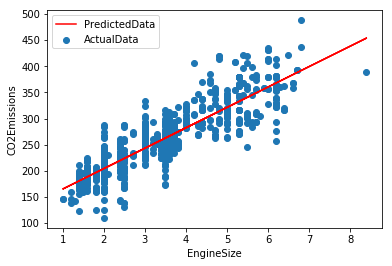

In [80]:
plt.scatter(x_train, y_train, label='ActualData')
plt.plot(x_train, calculated_y, color='r', label='PredictedData')
plt.xlabel('EngineSize')
plt.ylabel('CO2Emissions')
plt.legend()
plt.show()

__We observe that our regression model is quite accurate. Because most of the points are near to the regression line.__

### (c)
Plot a scatter plot between actual value of CO2EMISSIONS and predicted value of CO2EMISSIONS.

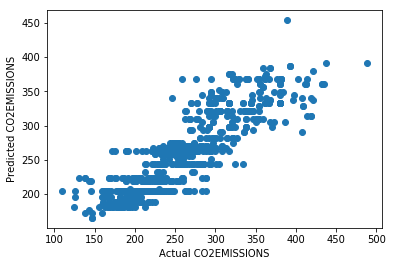

In [81]:
plt.scatter(y_train, calculated_y)
plt.xlabel('Actual CO2EMISSIONS')
plt.ylabel('Predicted CO2EMISSIONS')
plt.show()

### (d)
Find out the mean squared error using sklearn metrics module.

In [82]:
mse_simple = metrics.mean_squared_error(y_train, calculated_y)
mse_simple

936.786010308257

### Coefficient of determination (R^2 ):
In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

__The closer R-squared is to 1, the better the model fits your data.__

In [83]:
r2_simple = metrics.r2_score(y_train, calculated_y)
r2_simple

0.7644042001810549

## Task 6: Multivariate Prediction Model using Train and Test data

In other words, now we will make the model using more than one independent variables.

### (a)
Use emission_new Pandas dataframe to split data into training dataset and test dataset and perform multivariate Regression keeping all the parameters as decided above.

In [84]:
# splitting
X = emission_new[['ENGINESIZE', 'FUELCONSUMPTION_COMB']]
Y = emission_new[['CO2EMISSIONS']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [85]:
# Creating the linear regression object
multiple_regression = linear_model.LinearRegression()

In [86]:
multiple_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
# series of predicted values of co2 emissions
predicted_y = multiple_regression.predict(x_test)

### (b)
Plot a scatter plot between actual value of CO2EMISSIONS and predicted value of CO2EMISSIONS.

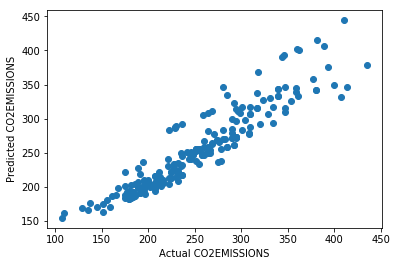

In [88]:
plt.scatter(y_test, predicted_y)
plt.xlabel('Actual CO2EMISSIONS')
plt.ylabel('Predicted CO2EMISSIONS')
plt.show()

### (c)
Find out the mean squared error using sklearn metrics module.

In [89]:
mse_multiple = metrics.mean_squared_error(y_test, predicted_y)
mse_multiple

543.5778099752674

### (d)
Explain which model is suitable (i.e. Linear Regression using Train and Test data or Multivariate Prediction Model using Train and Test data) using mean square value and R-value of regression.

In [90]:
r2_multiple = metrics.r2_score(y_test, predicted_y)
r2_multiple

0.8685405139405122

In [91]:
print('R^2 (coefficient of determination) regression score for simple regression = ', r2_simple)
print('mean squared error for simple liner regression = ', mse_simple)
print()
print('R^2 (coefficient of determination) regression score for multiple regression = ', r2_multiple)
print('mean squared error for simple liner regression = ', mse_multiple)

R^2 (coefficient of determination) regression score for simple regression =  0.7644042001810549
mean squared error for simple liner regression =  936.786010308257

R^2 (coefficient of determination) regression score for multiple regression =  0.8685405139405122
mean squared error for simple liner regression =  543.5778099752674


We know that:

__The closer R-squared is to 1, the better the model fits your data.__

So, here we can clearly see that multivariate regression model is better than simple linear regression.

Also, __Multivariate regression model has a smaller value of Mean squared error.__

## Conclusion:

Multivariate regression model is better than simple linear regression.